<a href="https://colab.research.google.com/github/MadhusudhanMasineni9/AdvanceMachineLearning/blob/main/Assignment1/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment1 - Neural Network Model

Import the imdb dataset from tensorflow.keras library

In [12]:
import numpy as np
import keras
import matplotlib 
import matplotlib.pyplot as plt

from keras import models
from keras import layers

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [13]:
max([max(sequence) for sequence in train_data])

9999

decode one of these reviews back to English words or mapping words to an integer index

In [14]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

Data Preparation

In [15]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# training data and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [16]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

1. You used two hidden layers. Try using one or three hidden layers, and see how doing so 
affects validation and test accuracy.  

In [17]:
#Build the model with 2, 3 and 4 layers

model_2l = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3l = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_4l = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [18]:
# Compiling the model

model_2l.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_3l.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_4l.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [19]:
# Creating validation set from the original training sets

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
# Training the models
history_2l = model_2l.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_3l = model_3l.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_4l = model_4l.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.5067 - accuracy: 0.7949 - val_loss: 0.4066 - val_accuracy: 0.8579
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3260 - accuracy: 0.8992 - val_loss: 0.3337 - val_accuracy: 0.8769
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2519 - accuracy: 0.9237 - val_loss: 0.2985 - val_accuracy: 0.8850
Epoch 4/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2085 - accuracy: 0.9351 - val_loss: 0.2790 - val_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1768 - accuracy: 0.9467 - val_loss: 0.2761 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1523 - accuracy: 0.9556 - val_loss: 0.2798 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1353 - accuracy: 0.9604 - val_loss: 0.2789 - val_accuracy: 0.8869
Epoch 8/20
30

In [22]:
# summary
model_2l.summary()
model_3l.summary()
model_4l.summary()

# This tells us the training loss and accuracy as well as validation loss and accuracy of the 3 models
history_dict2l = history_2l.history
history_dict3l = history_3l.history
history_dict4l = history_4l.history

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                160016    
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)            

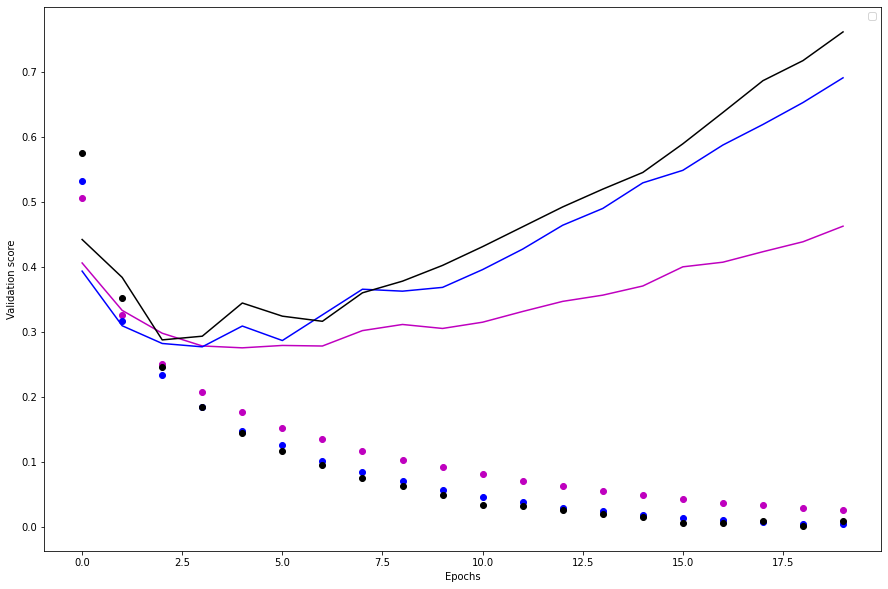

In [31]:
# Plot the training and validation loss
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.plot(history_dict2l['val_loss'], 'm', history_dict3l['val_loss'], 'b',history_dict4l['val_loss'], 'k')
plt.plot(history_dict2l['loss'], 'm', history_dict3l['loss'], 'b',history_dict4l['loss'], 'k', marker='o', linestyle='none')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend()

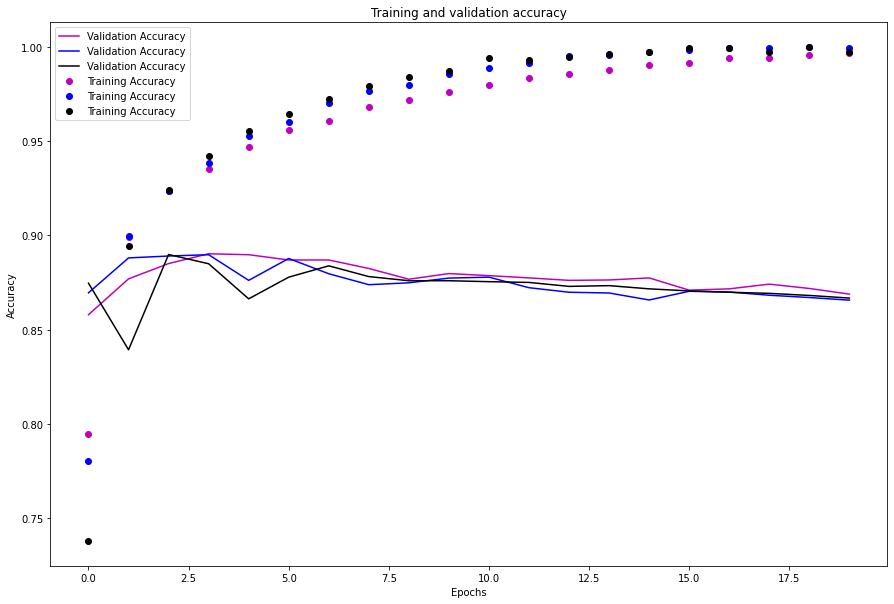

In [32]:
# Plot the training and validation accuracy
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

 
plt.plot(history_dict2l['val_accuracy'], 'm', history_dict3l['val_accuracy'], 'b',history_dict4l['val_accuracy'], 'k',  label="Validation Accuracy")
plt.plot(history_dict2l['accuracy'], 'm', history_dict3l['accuracy'], 'b',history_dict4l['accuracy'], 'k', marker='o', linestyle='none', label="Training Accuracy")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Observation: The accuracy of the network impacted by the number of hidden layers are reduced on the accuracy of the network as with the complex problem having less number of hidden layers it might be possible that network will not be trained properly. The number of hidden layers cross the optimal number of hidden layers (3 layers), time complexity increases in orders of magnitude as compared to the accuracy gain. The techniques implementing less than three number of hidden layers mostly had a loss in accuracy while the architecture implementing more than three numbers of hidden layers were found not to be optimal in terms of time complexity.

**2. Try using layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on**

In [34]:
model_3lh = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3lh.compile(optimizer="rmsprop",loss="binary_crossentropy",
              metrics=["accuracy"])

history_3lh = model_3lh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 0.4837 - accuracy: 0.7711 - val_loss: 0.3229 - val_accuracy: 0.8789
Epoch 2/20
30/30 [==============================] - 2s 62ms/step - loss: 0.2634 - accuracy: 0.8998 - val_loss: 0.2875 - val_accuracy: 0.8850
Epoch 3/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1905 - accuracy: 0.9313 - val_loss: 0.2891 - val_accuracy: 0.8845
Epoch 4/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1504 - accuracy: 0.9447 - val_loss: 0.2960 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1071 - accuracy: 0.9639 - val_loss: 0.3612 - val_accuracy: 0.8726
Epoch 6/20
30/30 [==============================] - 2s 63ms/step - loss: 0.0822 - accuracy: 0.9736 - val_loss: 0.3550 - val_accuracy: 0.8762
Epoch 7/20
30/30 [==============================] - 2s 60ms/step - loss: 0.0640 - accuracy: 0.9800 - val_loss: 0.3829 - val_accuracy: 0.8790
Epoch 8/20
30

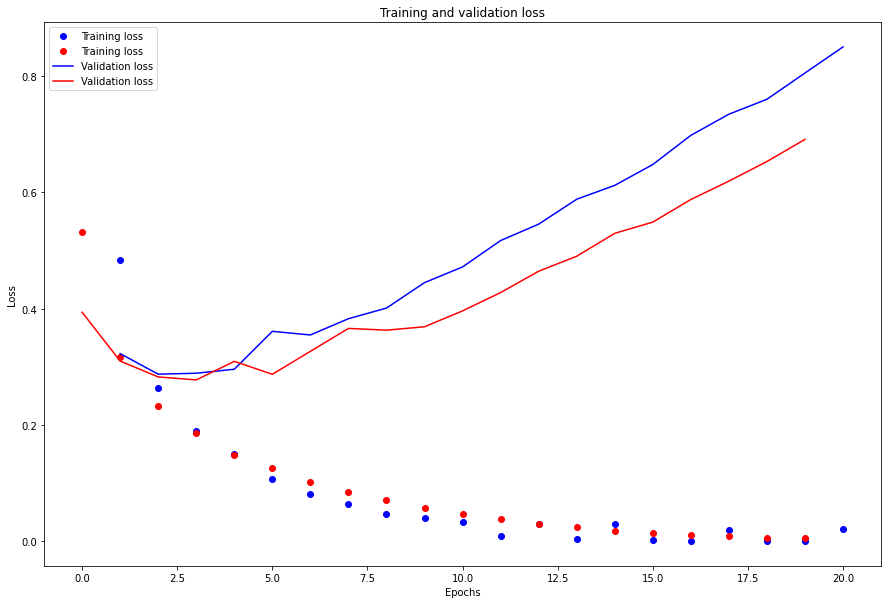

In [35]:
history_dict_3lh = history_3lh.history

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)


epochs = range(1, len(history_dict_3lh["loss"]) + 1)
plt.plot(epochs, history_dict_3lh["loss"], "bo",  history_dict3l['loss'], 'ro' , label="Training loss")
plt.plot(epochs, history_dict_3lh["val_loss"], 'b', history_dict3l['val_loss'], 'r', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

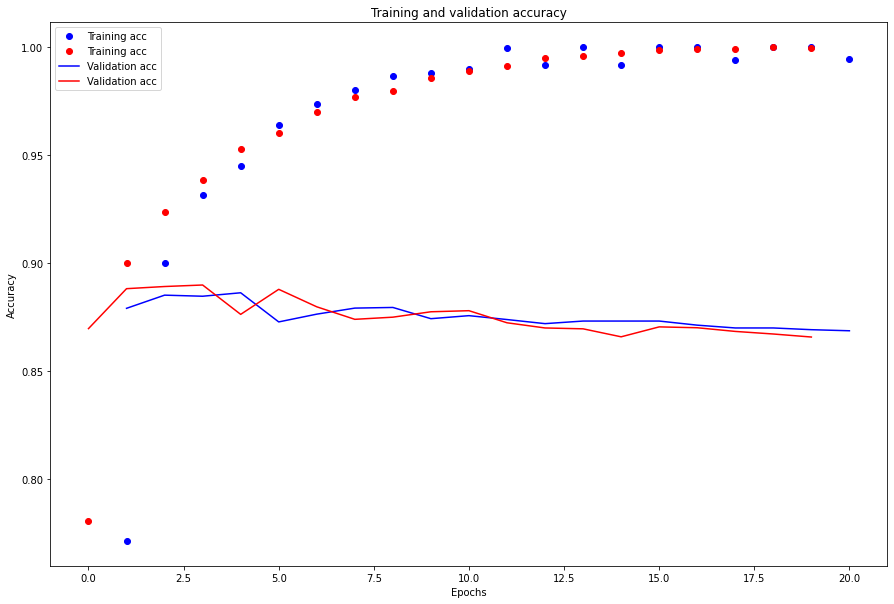

In [36]:
#This plot shows comparision of 2, 3 layers models with different number of nodes.

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.clf()
plt.plot(epochs,history_dict_3lh["accuracy"], "bo",history_dict3l['accuracy'], 'ro', label="Training acc")
plt.plot(epochs, history_dict_3lh["val_accuracy"], "b",history_dict3l['val_accuracy'], 'r', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

If we use a few hidden units, we will end up getting high training error and high generalization error due to underfitting and high statistical bias.

If we use too many hidden units, we may get low training error but still have high generalization error due to overfitting and high variance.


**3. Try using the 'MSE' loss function instead of 'binary_crossentropy'.**

In [37]:
model_3lm = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3lm.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Training your model
history_3lm = model_3lm.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict_3lm = history_3lm.history

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.1676 - accuracy: 0.7842 - val_loss: 0.1133 - val_accuracy: 0.8762
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0889 - accuracy: 0.9051 - val_loss: 0.0921 - val_accuracy: 0.8897
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0649 - accuracy: 0.9307 - val_loss: 0.0884 - val_accuracy: 0.8850
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0510 - accuracy: 0.9467 - val_loss: 0.0839 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0402 - accuracy: 0.9597 - val_loss: 0.0874 - val_accuracy: 0.8807
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0346 - accuracy: 0.9658 - val_loss: 0.0836 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.0278 - accuracy: 0.9745 - val_loss: 0.0854 - val_accuracy: 0.8828
Epoch 8/20
30

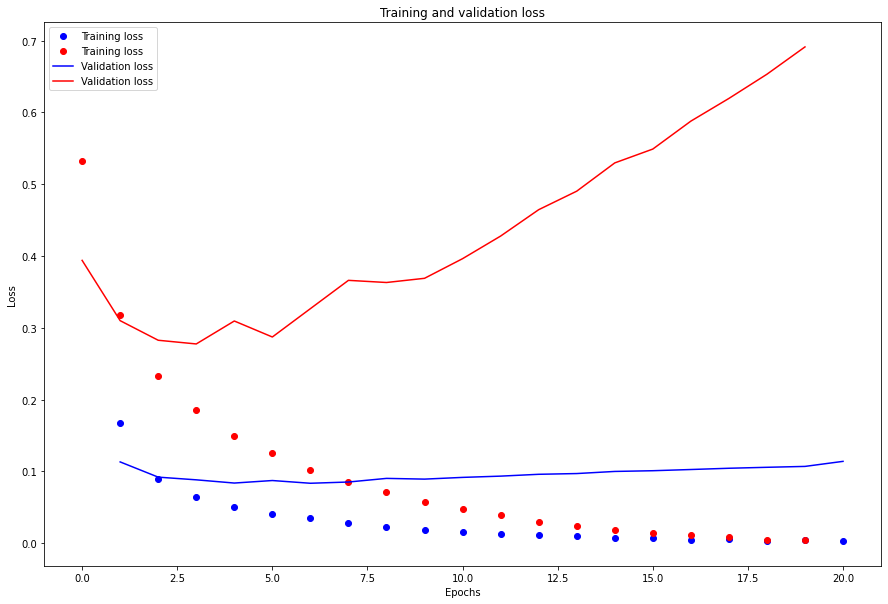

In [38]:
# Plot the training and validation loss for two model with different loss function

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

epochs = range(1, len(history_dict_3lm["loss"]) + 1)
plt.plot(epochs, history_dict_3lm["loss"], "bo",history_dict3l['loss'],'ro ', label="Training loss")
plt.plot(epochs, history_dict_3lm["val_loss"], 'b',history_dict3l['val_loss'],'r', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

<Figure size 432x288 with 0 Axes>

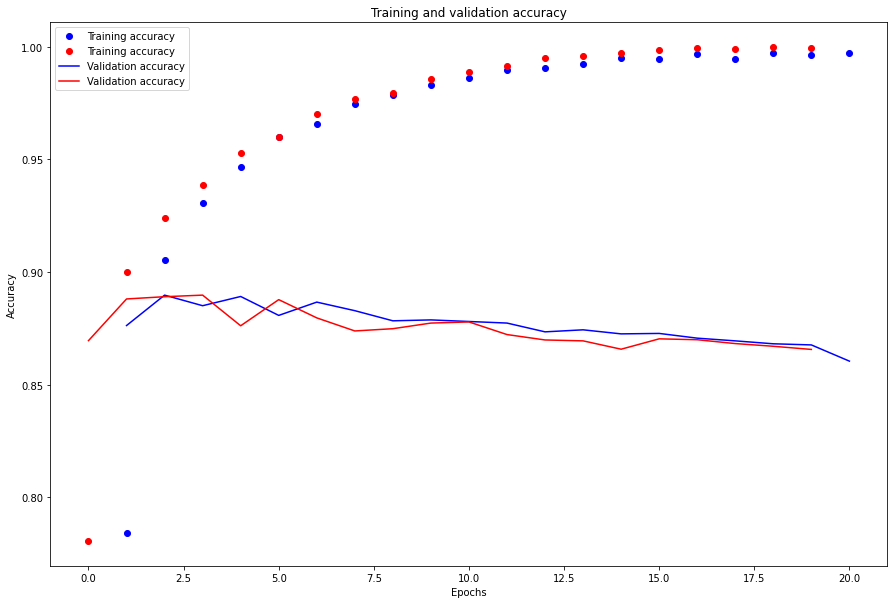

In [39]:
# Plot the training and validation accuracy for two model with different loss function
plt.clf()

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.plot(epochs,history_dict_3lm["accuracy"], "bo", history_dict3l['accuracy'], 'ro', label="Training accuracy")
plt.plot(epochs,history_dict_3lm["val_accuracy"], "b", history_dict3l['val_accuracy'], 'r',label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

Observation: The cross-entropy is the best to use in the output layer of your network if it has a sigmoid or softmax nonlinearity.

If instead we assume the target is continuous and normally distributed, and we need to maximize the likelihood of the output of the net under these assumptions,we can use MSE

For classification, cross-entropy tends to be more suitable than MSE.

**4.Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of 'relu'**

In [40]:
model_tanh = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_tanh.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history_tanh = model_tanh.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 99ms/step - loss: 0.1588 - accuracy: 0.7974 - val_loss: 0.1122 - val_accuracy: 0.8677
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0811 - accuracy: 0.9102 - val_loss: 0.0974 - val_accuracy: 0.8679
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0548 - accuracy: 0.9388 - val_loss: 0.0827 - val_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0419 - accuracy: 0.9501 - val_loss: 0.0864 - val_accuracy: 0.8812
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0309 - accuracy: 0.9655 - val_loss: 0.0951 - val_accuracy: 0.8731
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0248 - accuracy: 0.9720 - val_loss: 0.0908 - val_accuracy: 0.8795
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0205 - accuracy: 0.9773 - val_loss: 0.0949 - val_accuracy: 0.8785
Epoch 8/20
30

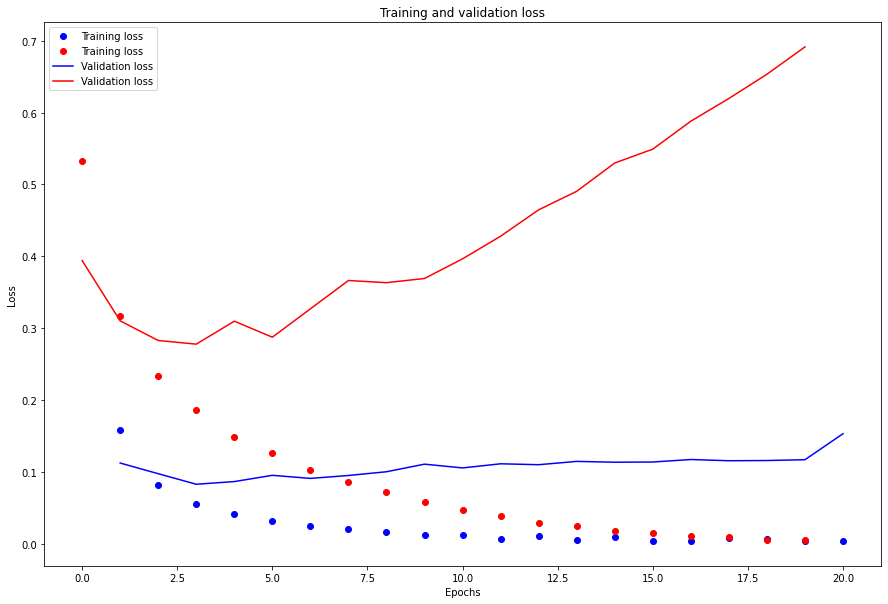

In [41]:
history_dict_tanh = history_tanh.history
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

epochs = range(1, len(history_dict_tanh["loss"]) + 1)
plt.plot(epochs, history_dict_tanh["loss"], "bo",history_dict3l['loss'],'ro ', label="Training loss")
plt.plot(epochs, history_dict_tanh["val_loss"], "b",history_dict3l['val_loss'],'r', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

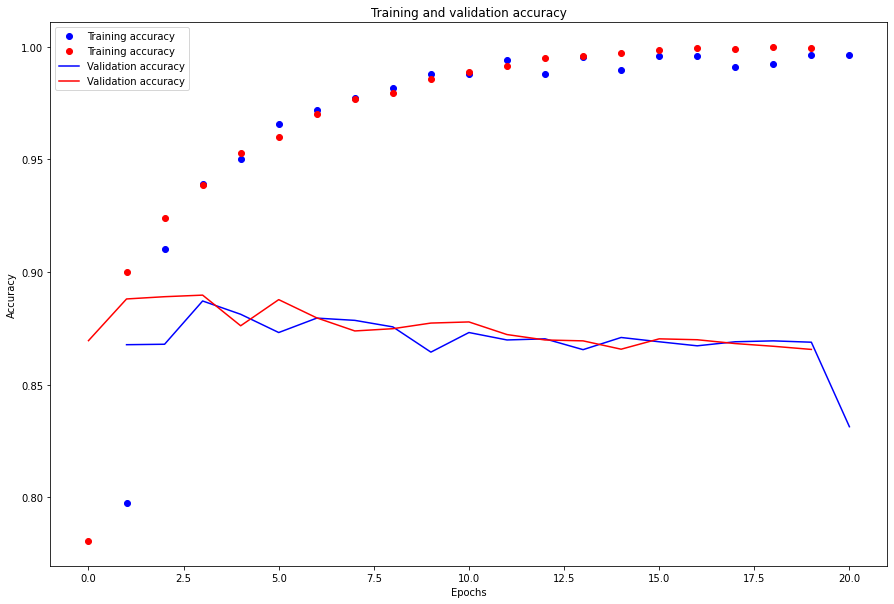

In [42]:
# Plot the training and validation accuracy
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.clf()
plt.plot(epochs,history_dict_tanh["accuracy"], "bo", history_dict3l['accuracy'], 'ro', label="Training accuracy")
plt.plot(epochs,history_dict_tanh["val_accuracy"], "b", history_dict3l['val_accuracy'], 'r',label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

**5.Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.**

In [43]:
model5 = keras.Sequential([                       
    layers.Dense(20, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(15, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [44]:
# Compiling the model

model5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [45]:
history5 = model5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.5397 - accuracy: 0.7652 - val_loss: 0.3958 - val_accuracy: 0.8710
Epoch 2/20
30/30 [==============================] - 2s 82ms/step - loss: 0.3373 - accuracy: 0.8895 - val_loss: 0.3277 - val_accuracy: 0.8720
Epoch 3/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2513 - accuracy: 0.9141 - val_loss: 0.3349 - val_accuracy: 0.8632
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2033 - accuracy: 0.9296 - val_loss: 0.2698 - val_accuracy: 0.8893
Epoch 5/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1687 - accuracy: 0.9415 - val_loss: 0.2751 - val_accuracy: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1355 - accuracy: 0.9569 - val_loss: 0.2845 - val_accuracy: 0.8886
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1157 - accuracy: 0.9607 - val_loss: 0.3050 - val_accuracy: 0.8838
Epoch 8/20
30

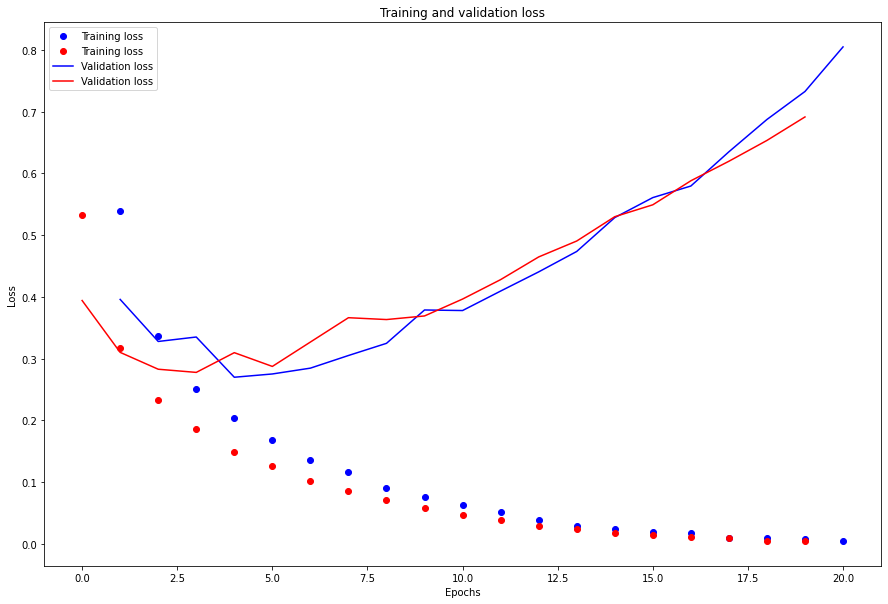

In [46]:
history_dict5 = history5.history

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

loss_values = history_dict5["loss"]
val_loss_values = history_dict5["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, history_dict5["loss"], "bo",history_dict3l['loss'],'ro ', label="Training loss")
plt.plot(epochs, history_dict5["val_loss"], "b",history_dict3l['val_loss'],'r', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

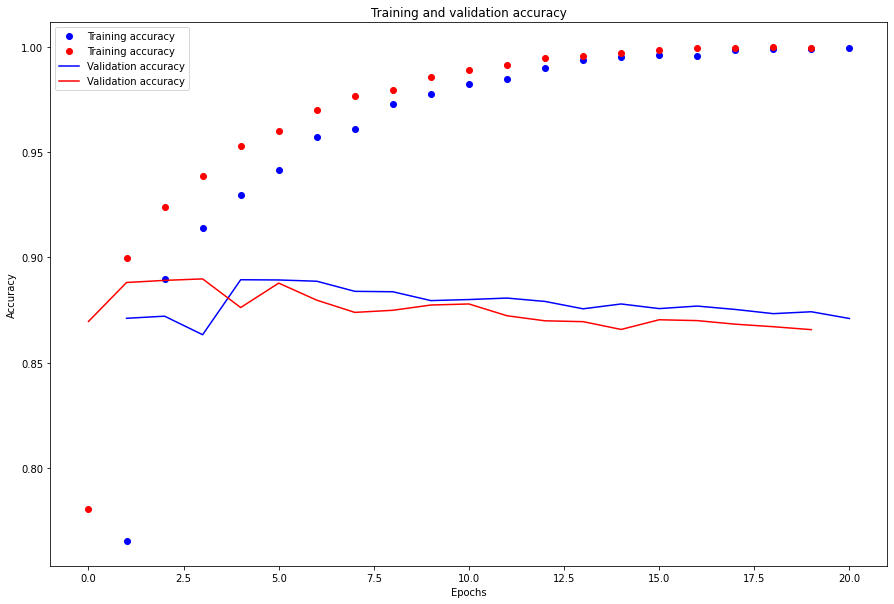

In [47]:
# Plot the training and validation accuracy
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.clf()

plt.plot(epochs,history_dict5["accuracy"], "bo", history_dict3l['accuracy'], 'ro', label="Training accuracy")
plt.plot(epochs,history_dict5["val_accuracy"], "b", history_dict3l['val_accuracy'], 'r',label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()